In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,kernel_size=3,padding='SAME',strides=2,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10,activation='softmax')
])


In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Define the model optimizer, loss function and metrics

opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.CategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc,mae])

In [6]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer,model.metrics,model.optimizer.lr)


sparse_categorical_crossentropy
<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f97940a4990> [] <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [10]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [11]:
# Rescale the image values so that they lie in between 0 and 1.
train_images=train_images/255.
test_images=test_images/255.


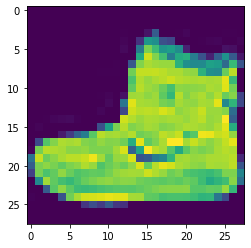

In [12]:
# Display one of the images
img=train_images[0,:,:]
plt.imshow(img)

In [13]:
# Fit the model

history=model.fit(train_images[...,np.newaxis],train_labels,epochs=20,batch_size=256)

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7510 - categorical_accuracy: 0.0966 - mean_absolute_error: 4.4200
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4667 - categorical_accuracy: 0.1024 - mean_absolute_error: 4.4200
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4291 - categorical_accuracy: 0.1033 - mean_absolute_error: 4.4200
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4102 - categorical_accuracy: 0.1048 - mean_absolute_error: 4.4200
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3972 - categorical_accuracy: 0.1038 - mean_absolute_error: 4.4200
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3887 - categorical_accuracy: 0.1041 - mean_absolute_error: 4.4200
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3796 - categorical_accuracy: 0.1043 - mean_absolute_error: 4.4200
Epoch 

In [14]:
# Load the history into a pandas Dataframe

df=pd.DataFrame(history.history)
df.head()

,loss,categorical_accuracy,mean_absolute_error
0,0.750952,0.096650,4.420000
1,0.466740,0.102433,4.420000
2,0.429088,0.103333,4.420001
3,0.410159,0.104817,4.420002
4,0.397241,0.103833,4.420001


[Text(0.5, 0, 'Epochs')]

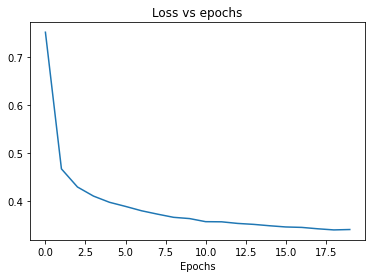

In [15]:
# Make a plot for the loss
loss_plot=df.plot(y='loss',title='Loss vs epochs',legend=False)

loss_plot.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

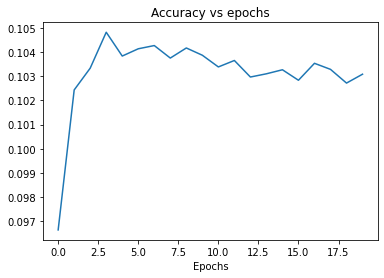

In [16]:
# Make a plot for the accuracy

loss_plot=df.plot(y='categorical_accuracy',title='Accuracy vs epochs',legend=False)

loss_plot.set(xlabel='Epochs')

[Text(0.5, 0, 'Epochs')]

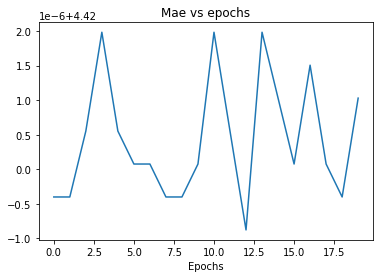

In [17]:
# Make a plot for the additional metric
loss_plot=df.plot(y='mean_absolute_error',title='Mae vs epochs',legend=False)

loss_plot.set(xlabel='Epochs')


In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Evaluate the model
test_loss,test_acc,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)


313/313 - 1s - loss: 0.3841 - categorical_accuracy: 0.1081 - mean_absolute_error: 4.4200


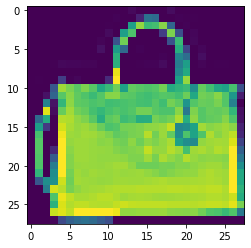

Label: Bag


In [20]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[30]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[30]]}")

In [21]:
# Get the model predictions
pred=model.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model predictions:{labels[np.argmax(pred)]}' )

Model predictions:Bag
